<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data_path = '/content/drive/My Drive/Dataset/diabetes.csv'
pima = pd.read_csv(data_path)
pima_tr = pima.sample(n = 200, replace = False)
pima_te = pima.sample(n = 332)

In [290]:
pima_tr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
622,6,183,94,0,0,40.8,1.461,45,0
733,2,106,56,27,165,29.0,0.426,22,0
633,1,128,82,17,183,27.5,0.115,22,0
748,3,187,70,22,200,36.4,0.408,36,1
322,0,124,70,20,0,27.4,0.254,36,1


In [0]:
negtive_sample, positive_sample = pima_tr.groupby('Outcome')
positive_sample, negtive_sample = positive_sample[1], negtive_sample[1]

In [0]:
def computate_expectation_variance(df):
  x = np.matrix([df['Glucose'].tolist(), df['BMI'].tolist()])
  u = np.matrix([[x[0].mean()],[x[1].mean()]])
  sigma = (x-u) * (x-u).T
  return u,sigma

In [0]:
u_p, sigma_p = computate_expectation_variance(positive_sample)
u_n, sigma_n = computate_expectation_variance(negtive_sample)
S = sigma_p.I - sigma_n.I
c = u_n.T*sigma_n.I - u_p.T*sigma_p.I
F = u_p.T*sigma_p.I*u_p - u_n.T*sigma_n.I*u_n + log(np.linalg.det(sigma_p)/np.linalg.det(sigma_n))-2*log((len(positive_sample)/len(pima_tr))/(negtive_sample.shape[0]/pima_tr.shape[0]))

In [309]:
sigma_p

matrix([[77292.87142857,  3911.34142857],
        [ 3911.34142857,  2899.59442857]])

In [0]:
def quadratic_rf(x, y):
  x = np.matrix([[x],[y]])
  bias = (x.T*S*x + 2*c*x + F).getA()
  return bias[0][0]

In [0]:
def linear_rf(x, y):
  x = np.matrix([[x],[y]])
  return 2*c*x + F

<a list of 8 text.Text objects>

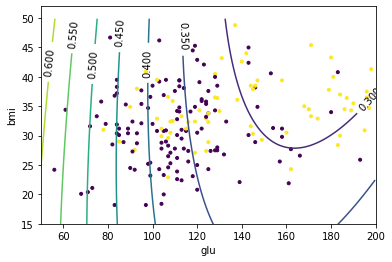

In [306]:
plt.figure('Decision boundary')
plt.scatter(pima_tr['Glucose'], pima_tr['BMI'], marker = '.', c = pima_tr['Outcome'])
plt.xlim(50, 200)
plt.ylim(15, 52)
plt.xlabel('glu')
plt.ylabel('bmi')

x = np.arange(50, 200, 0.3)
y = np.arange(0, 50, 0.1)
z = np.empty((len(x),len(y)),dtype='float')
for i in range(len(x)):
  for j in range(len(y)):
    z[i][j] = quadratic_rf(x[i], y[j])
#contour = plt.contour(x, y, z, [-6,-4,-2,0,2,4,6])
countour = plt.contour(x, y, z)
plt.clabel(countour, colors=('k'))

In [301]:
z.min()

0.25137188899907026

In [272]:
x = np.arange(0, 5, 1)
y = np.arange(0, 5, 1)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
X, Y, Z

(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]), array([[ 0,  1,  4,  9, 16],
        [ 1,  2,  5, 10, 17],
        [ 4,  5,  8, 13, 20],
        [ 9, 10, 13, 18, 25],
        [16, 17, 20, 25, 32]]))

In [303]:
(len(positive_sample)/len(pima_tr))/(negtive_sample.shape[0]/pima_tr.shape[0])

0.5384615384615384